# Support Vector Machine for Trading

**Background:**

Suppose you are working as an analyst at an investment bank. Your manager asked you to implement a new trading algorithm for Apple stock.

You decided to use the following indicators:

* Average True Range
* Commodity Channel Index
* Relative Strength Index
* Bollinger Bands
* On Balance Volume
* Momentum
* MACD


Your training set includes data up to 03/18/2022. You will apply time series cross-validation to tune the hyper-parameter. Test the model on the last 30 trading days.

**Objective**
* Use SVM Classification on financial data
* Use Randomized Search
* Use Time Series Cross Validation
* Evaluate trading model

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3989    0  3989    0     0   8058      0 --:--:-- --:--:-- --:--:--  8042
100  503k  100  503k    0     0   466k      0  0:00:01  0:00:01 --:--:--  466k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3941    0  3941    0     0  17832      0 --:--:-- --:--:-- --:--:-- 17752
100  406k  100  406k    0     0   467k      0 --:--:-- --:--:-- --:--:--  467k


In [ ]:
! pip install yfinance

     |████████████████████████████████| 63 kB 708 kB/s 
     |████████████████████████████████| 6.4 MB 12.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import yfinance as yf
import talib as ta
from talib import MA_Type  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import TimeSeriesSplit as tscv

In [ ]:
appl=yf.Ticker('aapl')
df=appl.history('max')

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100326,0.100762,0.100326,0.100326,469033600,0.0,0.0
1980-12-15,0.095528,0.095528,0.095092,0.095092,175884800,0.0,0.0
1980-12-16,0.088548,0.088548,0.088112,0.088112,105728000,0.0,0.0
1980-12-17,0.090293,0.090729,0.090293,0.090293,86441600,0.0,0.0
1980-12-18,0.092911,0.093347,0.092911,0.092911,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-25,161.119995,163.169998,158.460007,162.880005,96046400,0.0,0.0
2022-04-26,162.250000,162.339996,156.720001,156.800003,95623200,0.0,0.0
2022-04-27,155.910004,159.789993,155.380005,156.570007,88063200,0.0,0.0


In [ ]:
df['High Shifted']=None
df['Low Shifted'] = None
df['Close Shifted'] = None
df['Upper BBand'], df['Middle BBand'],df['Lower BBand']= None
df['RSI'] = None
df['Macd'], df['Macd Signal'],df['Macd Hist'] = None
df['Momentum'] = None
df['OBV'] = None
df['ATR'] = None
df['Returns'] = None
df['CCI']=None
df['Signal'] =None

df.dropna(inplace=True)

X=df.drop(['Signal','Returns','Open','Close','Volume','High','Low','Dividends','Stock Splits'],1)
Y=df['Signal']


In [ ]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler()

In [ ]:
X_train =minmax.fit_transform(X.iloc[:-30,:])
X_test = pd.DataFrame(minmax.fit_transform(X)).iloc[-30:,:]
y_train = Y.iloc[:-30]
y_test = Y.iloc[-30:]

In [ ]:
# Takes approx 6 mins
# Call the classifier:
clf = None
# Parameter Grid
param_grid={'C':[None]}
# Randomized Search over Space and Fit:
clf_search = RandomizedSearchCV(None)
clf_search.fit(None)
# Predict
y_pred=clf_search.predict(X_test)

In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)

In [ ]:
print(Accuracy)
print(Precision)
print(Recall)

0.6666666666666666
0.7857142857142857
0.6111111111111112


In [ ]:
df['SVM Signal'] = 0
df['SVM Returns'] = 0
df['Total Strat Returns'] = 0
df['Market Returns'] = 0    

In [ ]:
Signal_Column = df.columns.get_loc('SVM Signal')
Strat_Column = df.columns.get_loc('SVM Returns')
Return_Column = df.columns.get_loc('Total Strat Returns')
Market_Column = df.columns.get_loc('Market Returns')
     
df.iloc[-30:,Signal_Column] = list(map(int,y_pred))
df['SVM Returns'] = df['SVM Signal'] * df['Returns'].shift(-1)
    
df.iloc[-30:,Return_Column] = np.nancumsum(df['SVM Returns'][-30:])
df.iloc[-30:,Market_Column] = np.nancumsum(df['Returns'][-30:])
    
df['Sharpe_Ratio'] = (df['Total Strat Returns'][-1] - df['Market Returns'][-1])/np.nanstd(df['Total Strat Returns'][-30:])

In [ ]:
df['Total Strat Returns'].sum()

2.1611955585933487

In [ ]:
print(Accuracy)
print(Precision)
print(Recall)

0.6666666666666666
0.7857142857142857
0.6111111111111112


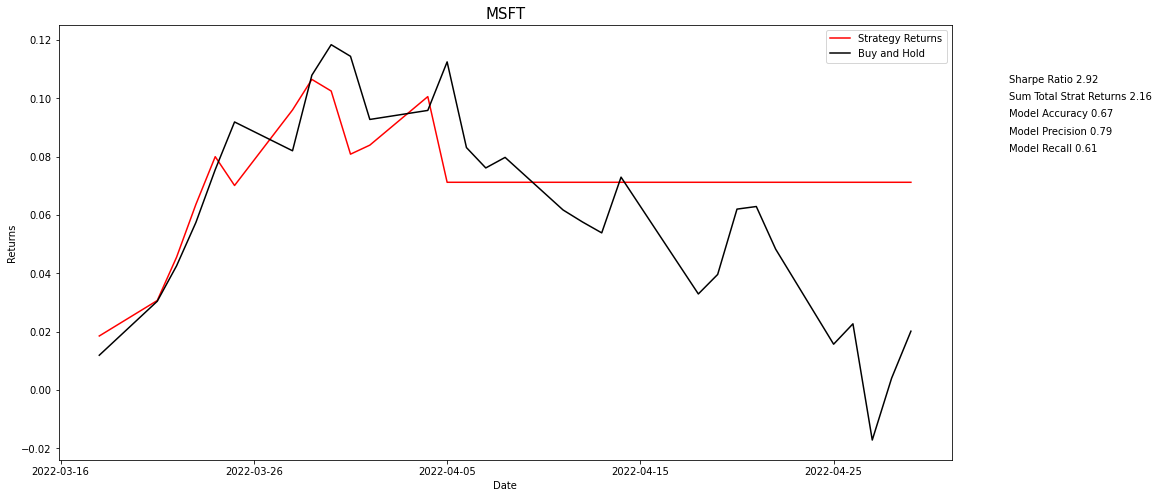

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(16, 8
                                ))

ax.plot(df[-30:].index.values, df['Total Strat Returns'][-30:].values, color='r', label="Strategy Returns")
ax.plot(df[-30:].index.values, df['Market Returns'][-30:].values, color='k', label="Buy and Hold")
    
ax.set(xlabel= "Date",ylabel="Returns")
plt.title('MSFT',fontsize=15)
ax.xaxis.set_major_locator(ticker.AutoLocator())
    
plt.figtext(.95,0.78, s="Sharpe Ratio "+'2.92')
plt.figtext(.95,0.75, s="Sum Total Strat Returns "+'2.16')
plt.figtext(.95,0.72,s="Model Accuracy " +'0.67')
plt.figtext(.95,0.69,s="Model Precision " +'0.79')
plt.figtext(.95,0.66,s="Model Recall " +'0.61')
    
plt.legend(loc='best')
plt.show()